In [26]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir1 = "/home/ben/Documents/analysis_code/spectrum_analysis/output"
dir2 = "/home/ben/Documents/analysis_code/spectrum_analysis/116Cd_d,p_bite_1_unnorm/output"

In [3]:
files1 = glob.glob(dir1 + "/*")
files2 = glob.glob(dir2 + "/*")

In [15]:
files1 = np.sort(files1)
files2 = np.sort(files2)

In [16]:
tables_old = []
tables_new = []

for file in files2:
    df = pd.read_table(file, sep = ' ')
    idx = [0,2,9,10,14,18]
    df = df.loc[idx,:]
    df = df.reset_index()
    df = df.loc[:,'PEAK_POSITION':]
    tables_old.append([file, df])
    
for file in files1:
    df = pd.read_table(file, sep = ' ')
    idx = [0,1,2,3,4,5]
    df["idx"] = idx
    df = df.reset_index()
    df = df.loc[:,'PEAK_POSITION':]
    tables_new.append([file, df])

In [43]:
tables_old

[['/home/ben/Documents/analysis_code/spectrum_analysis/116Cd_d,p_bite_1_unnorm/output/116Cd_d,p_117Cd_10degrees_bite_1_peaks.txt',
     PEAK_POSITION  PEAK_ENERGY  CROSS_SECTION     ERROR
  0        1862.14          0.0       3.781389  0.057589
  1        1665.95        136.0       2.006683  0.041367
  2        1174.20        498.0       0.114366  0.010544
  3        1144.00        522.0       0.194666  0.013789
  4         964.60        665.0       0.596165  0.023522
  5         825.00        779.0       0.102200  0.009733],
 ['/home/ben/Documents/analysis_code/spectrum_analysis/116Cd_d,p_bite_1_unnorm/output/116Cd_d,p_117Cd_18degrees_bite_1_peaks.txt',
     PEAK_POSITION  PEAK_ENERGY  CROSS_SECTION     ERROR
  0        1861.04          0.0       0.293141  0.007158
  1        1664.14        136.0       2.030011  0.018977
  2        1172.10        498.0       0.075075  0.003995
  3        1140.69        522.0       0.257518  0.006991
  4         961.10        665.0       0.631060  0.01

In [41]:
xso0, eo0 = [],[]
xso1, eo1 = [],[]
xso2, eo2 = [],[]
xso3, eo3 = [],[]
xso4, eo4 = [],[]
xso5, eo5 = [],[]


for i in range(len(tables_old)): 
    xso0.append(tables_old[i][1].loc[0,"CROSS_SECTION"])
    xso1.append(tables_old[i][1].loc[1,"CROSS_SECTION"])   
    xso2.append(tables_old[i][1].loc[2,"CROSS_SECTION"])
    xso3.append(tables_old[i][1].loc[3,"CROSS_SECTION"])
    xso4.append(tables_old[i][1].loc[4,"CROSS_SECTION"])
    xso5.append(tables_old[i][1].loc[5,"CROSS_SECTION"])
    
    eo0.append(tables_old[i][1].loc[0,"ERROR"]) 
    eo1.append(tables_old[i][1].loc[1,"ERROR"]) 
    eo2.append(tables_old[i][1].loc[2,"ERROR"]) 
    eo3.append(tables_old[i][1].loc[3,"ERROR"]) 
    eo4.append(tables_old[i][1].loc[4,"ERROR"]) 
    eo5.append(tables_old[i][1].loc[5,"ERROR"]) 

In [44]:
xsn0, en0 = [],[]
xsn1, en1 = [],[]
xsn2, en2 = [],[]
xsn3, en3 = [],[]
xsn4, en4 = [],[]
xsn5, en5 = [],[]

for i in range(len(tables_new)): 
    xsn0.append(tables_new[i][1].loc[0,"CROSS_SECTION"])
    xsn1.append(tables_new[i][1].loc[1,"CROSS_SECTION"])   
    xsn2.append(tables_new[i][1].loc[2,"CROSS_SECTION"])
    xsn3.append(tables_new[i][1].loc[3,"CROSS_SECTION"])
    xsn4.append(tables_new[i][1].loc[4,"CROSS_SECTION"])
    xsn5.append(tables_new[i][1].loc[5,"CROSS_SECTION"])
    
    en0.append(tables_new[i][1].loc[0,"ERROR"]) 
    en1.append(tables_new[i][1].loc[1,"ERROR"]) 
    en2.append(tables_new[i][1].loc[2,"ERROR"]) 
    en3.append(tables_new[i][1].loc[3,"ERROR"]) 
    en4.append(tables_new[i][1].loc[4,"ERROR"]) 
    en5.append(tables_new[i][1].loc[5,"ERROR"])
    
en0

[0.06442378412573566,
 0.02670339080342993,
 0.03998510242022671,
 0.03156683664772561,
 0.05008442615180532,
 0.02367681570388722]

In [45]:
an = [12,18,25,31,35,40]
ao = [10,18,25,31,40]

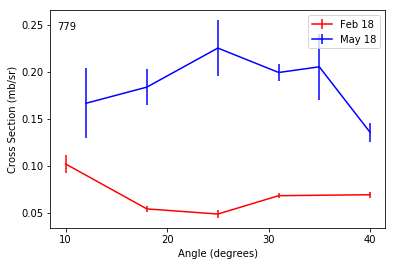

In [83]:
fig, ax = plt.subplots()

ax.set_xticks([10, 20, 30, 40])
ax.set_xlabel("Angle (degrees)")
ax.set_ylabel("Cross Section (mb/sr)")

ax.errorbar(ao, xso5, eo5, color = 'r', label = "Feb 18")
ax.errorbar(an, xsn5, en5, color = 'b', label = "May 18")

fig.text(0.02,0.95, 779, ha="left", va="top", transform=plt.gca().transAxes)

ax.legend()

fig.savefig("febmaydists/ex5.png")